### Exercise 11.1
In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, 𝑁epochs, the number of data points, 𝑁train, and on the noise, 𝜎. Try to improve the previous result operating on these parameters.
Per rispondere a tale richiesta ho costruito la funzione fit lin, in modo che possa esplorare i risultati diversi ottenuti per la regressione lineare in funzione delle epoche, del numero di punti su cui la rete si allena e in funzione del rumore. Dopo aver eseguito la funzione riporto i risultati e i commenti relativi.

Per rispondere a tale richiesta ho costruito la funzione fit lin, in modo che possa esplorare i risultati diversi ottenuti per la regressione lineare in funzione delle epoche, del numero di punti su cui la rete si allena e in funzione del rumore. 
Dopo aver eseguito la funzione riporto i risultati e i commenti relativi.

In [0]:
def fit_lin (Nx_train, Nepochs, dispersion):  
  # target parameters of f(x) = m*x + b
  m = 2 # slope
  b = 1 # intersect

  import numpy as np

  # generate training inputs

  np.random.seed(0)
  x_train = np.random.uniform(-1, 1, Nx_train)
  x_valid = np.random.uniform(-1, 1, Nx_train)
  x_valid.sort()
  y_target = m * x_valid + b # ideal (target) linear function

  sigma = dispersion # noise standard deviation, for the moment it is absent
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(m * x_valid + b, sigma)

  # plot training and target dataset
  import matplotlib.pyplot as plt
  #plt.plot(x_valid, y_target)
  #plt.scatter(x_valid, y_valid, color='r')
  #plt.grid(True); 
  
  # compose the NN model
  import tensorflow as tf
  from tensorflow import keras

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Activation
  from tensorflow.keras import backend as K
  from tensorflow.keras.utils import get_custom_objects

  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))

  # compile the model choosing optimizer, loss and metrics objects
  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

  # get a summary of our composed model
  model.summary()


  # fit the model using training dataset
  # over N epochs of X batch size each
  # report training progress against validation data
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
  
  # return weights
  print(model.get_weights())

  # evaluate model
  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # evaluate model with the exact curve
  score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # look into training history
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.show()

  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted,color='r')
  plt.plot(x_valid, y_target)
  plt.grid(True)
  plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[1.9764878]], dtype=float32), array([0.9997014], dtype=float32)]
16/16 [==============================] - 0s 1ms/step - loss: 1.8563e-04 - mse: 1.8563e-04

Test loss: 0.0001856287708505988
Test accuracy: 0.0001856287708505988
16/16 [==============================] - 0s 1ms/step - loss: 1.8563e-04 - mse: 1.8563e-04

Test loss: 0.0001856287708505988
Test accuracy: 0.0001856287708505988


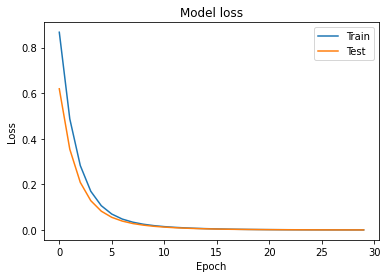

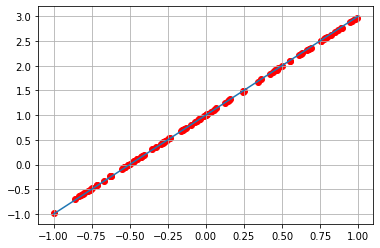

In [0]:
fit_lin(500, 30, 0.0)


**Ntrain =500, Nepoch=30, sigma=0**

Aumentando il numero di data train, ossia il numero di dati sui quali la rete neurale impara, i risultati forniti per il fit migliorano immediatamente. 
Basta moltilicare x10 Xtrain (e di consegunza Xvalid) e i valori offerti dal modello per m e q si discostano da quelli attesi per valori dell'ordine del centesimo, 
(m=1.997034, q=0.9999452).
**************************************************************












Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[1.9901705]], dtype=float32), array([0.9998918], dtype=float32)]
16/16 [==============================] - 0s 1ms/step - loss: 3.2442e-05 - mse: 3.2442e-05

Test loss: 3.244227627874352e-05
Test accuracy: 3.244227627874352e-05
16/16 [==============================] - 0s 1ms/step - loss: 3.2442e-05 - mse: 3.2442e-05

Test loss: 3.244227627874352e-05
Test accuracy: 3.244227627874352e-05


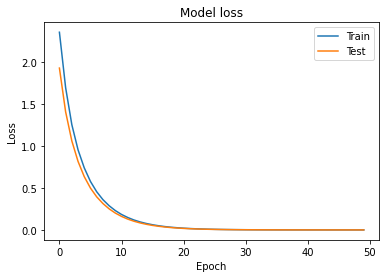

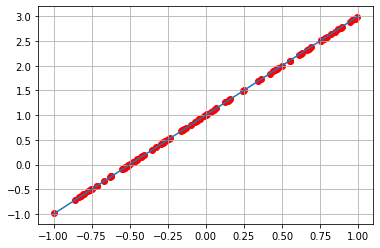

In [0]:
fit_lin(500, 50, 0.0)

CASO 2:
**Ntrain =500, Nepoch=50, sigma=0**

Rispetto al caso precedente abbiamo aumentato di 20 il numero delle epoche. Osservando la funzione costo si nota come dopo un certo numero di epoche il model loss tende a rimanere costante, cioè la rete non riesce più ad imparare.
Dunque, quando il numero di Xtrain è sufficientemente alto anche aumentare notevolmente il numero di epoche non migliora significativamente la bontà del fit.
**************************************************************

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[1.8374617]], dtype=float32), array([1.1068347], dtype=float32)]
16/16 [==============================] - 0s 1ms/step - loss: 3.9873 - mse: 3.9873

Test loss: 3.9873251914978027
Test accuracy: 3.9873251914978027
16/16 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206

Test loss: 0.0206169243901968
Test accuracy: 0.0206169243901968


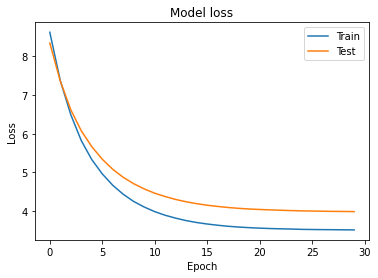

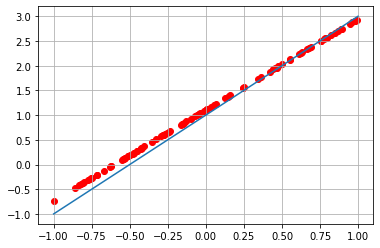

In [0]:
fit_lin(500, 30, 2)

CASO 3: **Ntrain =500, Nepoch=50, sigma=2**

Si noti invece che grandi valori di sigma, ovvero grande rumore, determina una diminuizione della capacità di apprendimento.
**************************************************************

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[1.4045707]], dtype=float32), array([0.98520064], dtype=float32)]
16/16 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191

Test loss: 0.11912662535905838
Test accuracy: 0.11912662535905838
16/16 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191

Test loss: 0.11912662535905838
Test accuracy: 0.11912662535905838


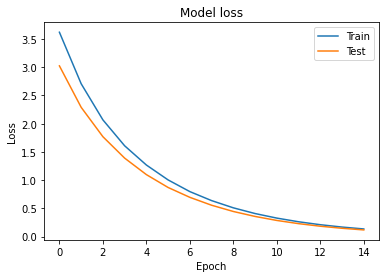

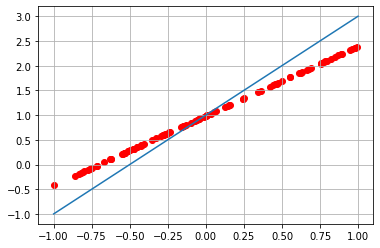

In [0]:
fit_lin(500, 15, 0)

CASO 4: **Ntrain =500, Nepoch=15, sigma=0**

Dimezzando il numero delle epoche la rete non ha abbastanza iterazioni disponibili per imparare dai dati messi a disposizione. 
Dunque anche il numero di epoche è un parametro importante per la bontà del fit.
**************************************************************